# **Importing Data Set**

In [3]:
import kagglehub

path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 80.6k/80.6k [00:00<00:00, 48.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1


# **Tools & Libraries**

In [14]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# For handling imbalance later
from imblearn.over_sampling import SMOTE


# **Data Loading**

In [5]:
import os
import pandas as pd

print(path)
files = os.listdir(path)
files

csv_files = [f for f in files if f.lower().endswith(".csv")]
print("CSV files:", csv_files)

df = pd.read_csv(os.path.join(path, csv_files[0]))
print(df.shape)
df.head()


/root/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1
CSV files: ['loan_approval_dataset.csv']
(4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **Check for Spacing issue**

In [6]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# **Quick mitigation**

In [7]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
df["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [9]:
cat_cols = ["education", "self_employed", "loan_status"]

for col in cat_cols:
    df[col] = df[col].str.strip()

for col in cat_cols:
    print(col, ":", df[col].unique())


education : ['Graduate' 'Not Graduate']
self_employed : ['No' 'Yes']
loan_status : ['Approved' 'Rejected']


# **Exploratory Data Analysis (EDA)**

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [11]:
df.shape

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **Check For Null Values**

In [12]:
# Count null/NaN values in each column
df.isnull().sum()

# Percentage of missing values per column (to see severity)
(df.isnull().sum() / len(df)) * 100


,0
loan_id,0.0
no_of_dependents,0.0
education,0.0
self_employed,0.0
income_annum,0.0
loan_amount,0.0
loan_term,0.0
cibil_score,0.0
residential_assets_value,0.0
commercial_assets_value,0.0


# **Categorical variables cleaned & manually encoded:**
education: Graduate=0, Not Graduate=1

self_employed: No=0, Yes=1

loan_status (target): Rejected=0, Approved=1

In [24]:
df_clean = df.copy()

# Remove leading spaces from column names
df_clean.columns = df_clean.columns.str.lstrip()

# Encode manually for clarity
df_clean["education"] = df_clean["education"].map({"Graduate": 0, "Not Graduate": 1})
df_clean["self_employed"] = df_clean["self_employed"].map({"No": 0, "Yes": 1})
df_clean["loan_status"] = df_clean["loan_status"].map({"Rejected": 0, "Approved": 1})

display(df_clean.head())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


# **Find The Correlation **

In [25]:
df_clean.corr()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,-0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.020936,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,0.018595,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246


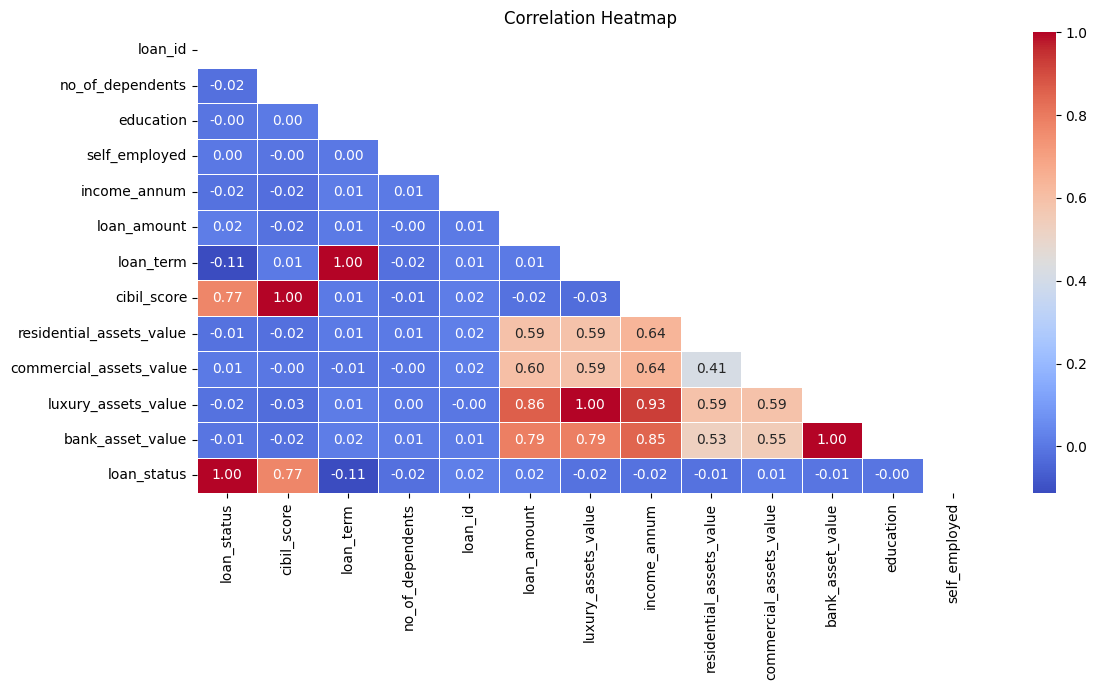

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corr = df_clean.corr()


corr = corr.loc[corr.index, corr['loan_status'].abs().sort_values(ascending=False).index]

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Strong positive correlation: CIBIL Score (0.77) with Loan Status.

/tmp/ipython-input-1567246716.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y=col, data=df_clean, palette="Set2")
/tmp/ipython-input-1567246716.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y=col, data=df_clean, palette="Set2")
/tmp/ipython-input-1567246716.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y=col, data=df_clean, palette="Set2")
/tmp/ipython-input-1567246716.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

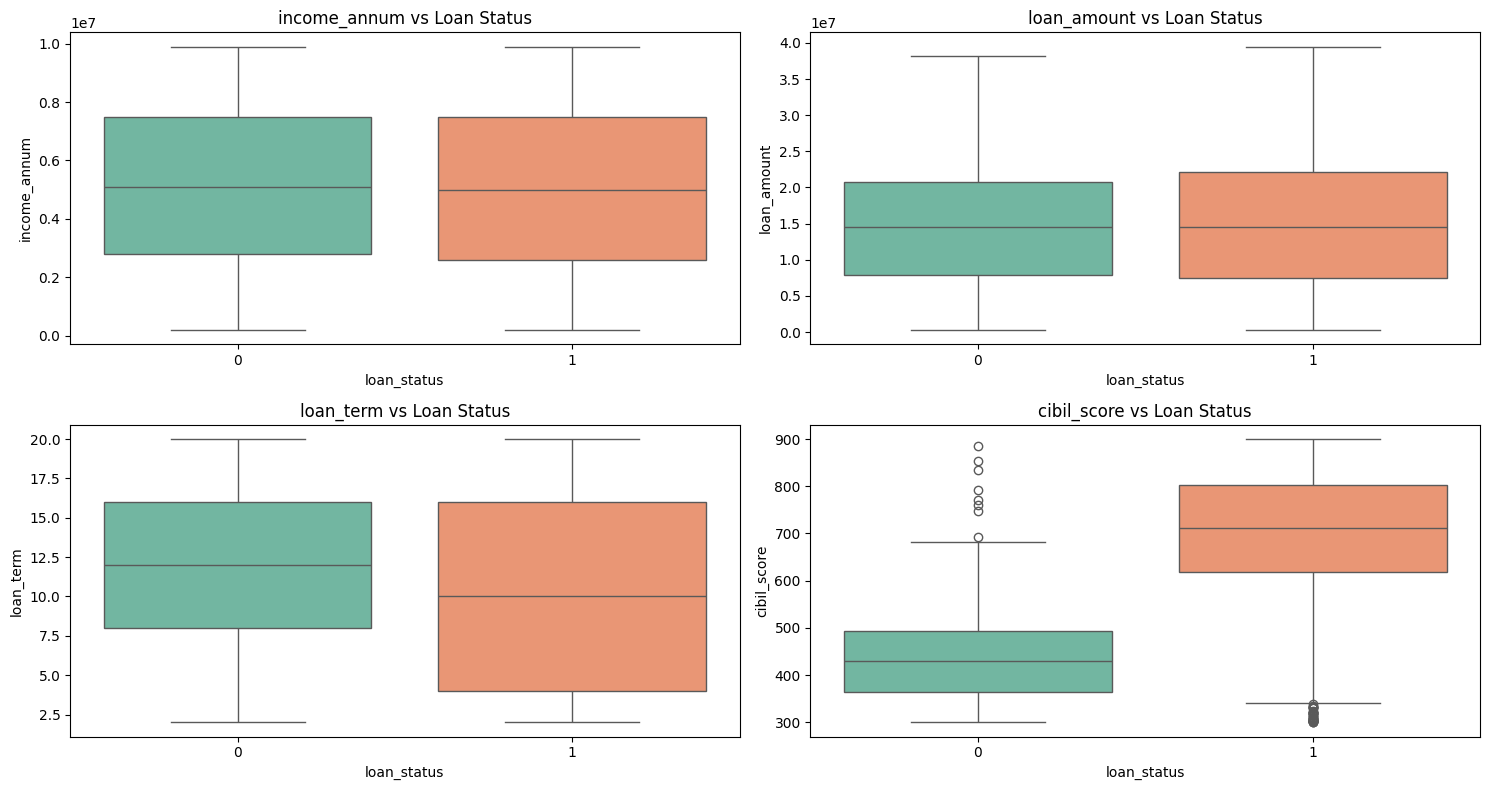

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["income_annum", "loan_amount", "loan_term", "cibil_score"]

plt.figure(figsize=(15,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="loan_status", y=col, data=df_clean, palette="Set2")
    plt.title(f"{col} vs Loan Status")

plt.tight_layout()
plt.show()


# **Data Imbalance Check**

loan_status
1    2656
0    1613
Name: count, dtype: int64
loan_status
1    62.215976
0    37.784024
Name: proportion, dtype: float64


/tmp/ipython-input-4266840279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df_clean, palette="Set2")


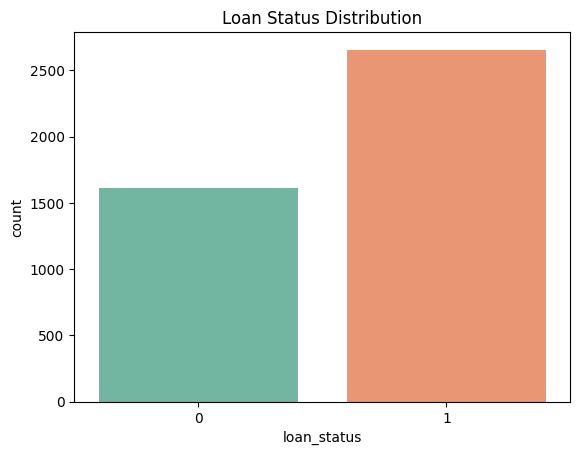

In [31]:
print(df_clean["loan_status"].value_counts())

print(df_clean["loan_status"].value_counts(normalize=True) * 100)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="loan_status", data=df_clean, palette="Set2")
plt.title("Loan Status Distribution")
plt.show()


# **Data Preprocessing**

## Train/Test split (80/20).
### Applied SMOTE only on training set to balance classes.

Spliting is done first to ensure that model will not be trained on fake data

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_clean.drop("loan_status", axis=1)
y = df_clean["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:")
print("Train class distribution:\n", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print("Train class distribution:\n", y_train_res.value_counts())


Before SMOTE:
Train class distribution:
 loan_status
1    2125
0    1290
Name: count, dtype: int64

After SMOTE:
Train class distribution:
 loan_status
1    2125
0    2125
Name: count, dtype: int64


# **Models Trained**

# **Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)  # you can tune depth later

dt_model.fit(X_train_res, y_train_res)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       323
           1       0.97      0.99      0.98       531

    accuracy                           0.97       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854


Confusion Matrix:
[[304  19]
 [  4 527]]


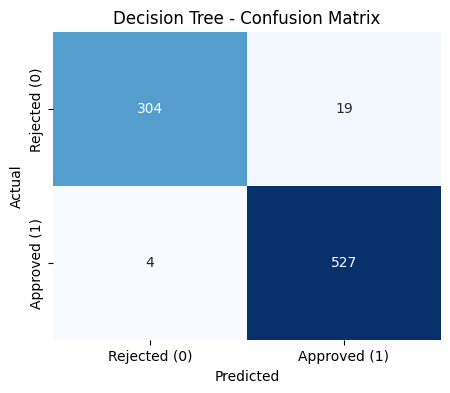

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


# **Logistic Regression**

Logistic Regression — Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       323
           1       0.95      0.93      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



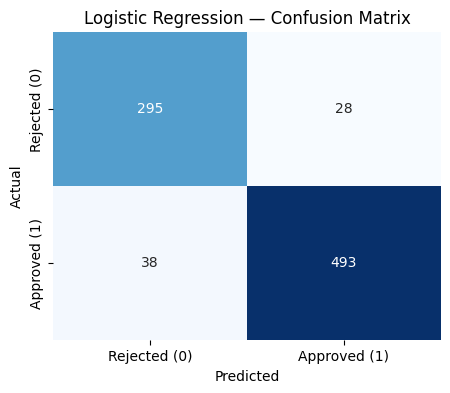

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_clf.fit(X_train_res, y_train_res)

y_pred_lr = log_reg_clf.predict(X_test)

print("Logistic Regression — Classification Report")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression — Confusion Matrix")
plt.show()


# **Random Forest**

Random Forest — Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



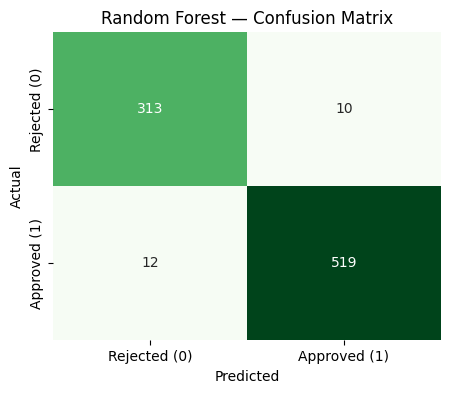

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=None,     # allow trees to grow fully
    random_state=42
)

# Train on SMOTE-balanced training set
rf_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest — Classification Report")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest — Confusion Matrix")
plt.show()


# **Gradient Boosting**

Gradient Boosting — Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

ROC-AUC: 0.998


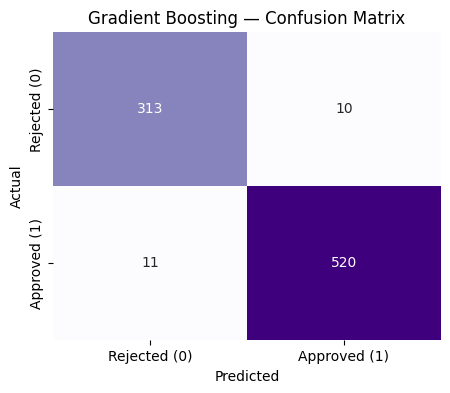

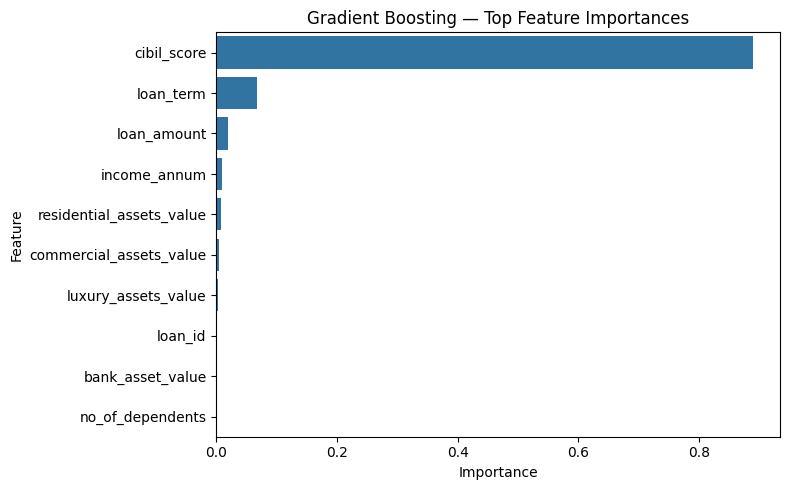

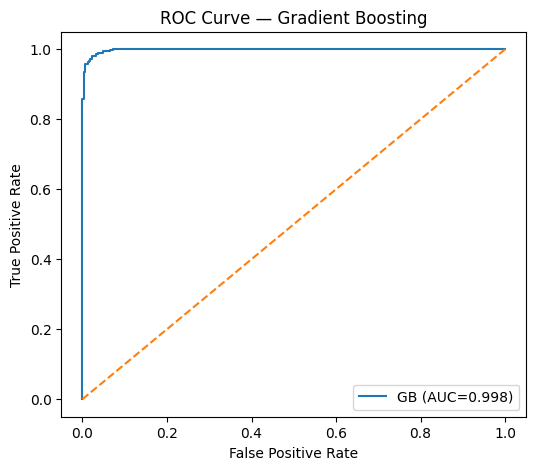

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1) Train Gradient Boosting on the SMOTE-balanced training set
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)

# 2) Predict on the untouched test set
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# 3) Metrics
print("Gradient Boosting — Classification Report")
print(classification_report(y_test, y_pred_gb))

auc = roc_auc_score(y_test, y_proba_gb)
print(f"ROC-AUC: {auc:.3f}")

# 4) Confusion Matrix Heatmap
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting — Confusion Matrix")
plt.show()

# 5) Feature Importances (top 10)
importances = gb_model.feature_importances_
feat_names = X.columns
idx = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[idx], y=np.array(feat_names)[idx])
plt.title("Gradient Boosting — Top Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 6) ROC Curve (optional visual)
fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"GB (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Gradient Boosting")
plt.legend()
plt.show()


# **Results & Comparison**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Store results
results = {}

# Decision Tree
results["Decision Tree"] = [
    accuracy_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_dt)
]

# Logistic Regression
results["Logistic Regression"] = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
]

# Random Forest
results["Random Forest"] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# Gradient Boosting
results["Gradient Boosting"] = [
    accuracy_score(y_test, y_pred_gb),
    precision_score(y_test, y_pred_gb),
    recall_score(y_test, y_pred_gb),
    f1_score(y_test, y_pred_gb)
]

# Put into DataFrame for a nice table
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T
print(results_df)


                     Accuracy  Precision    Recall  F1-score
Decision Tree        0.973068   0.965201  0.992467  0.978644
Logistic Regression  0.922717   0.946257  0.928437  0.937262
Random Forest        0.974239   0.981096  0.977401  0.979245
Gradient Boosting    0.975410   0.981132  0.979284  0.980207


# **Conclusion**
* Gradient Boosting was the best-performing model, slightly better than Random
Forest.
* Decision Tree had the highest recall (good for catching risky applications).
* Logistic Regression was interpretable but less accurate.
* IBIL Score was the most important factor in predicting loan approval.